# Snapshot to HDF
Converting single sanpshots is something, that you will rarely need, but is used by the algorithm when coverting planes or cases (multi-planes) which is the standard usecase.

In [1]:
import h5rdmtoolbox as h5tbx

c:\users\da4323\documents\programming\github\h5rdmtoolbox\h5rdmtoolbox\h5wrapper\h5piv.py:671: SpecialDatasetRegistrationWarning: registration of accessor <class 'h5rdmtoolbox.h5wrapper.h5piv.PIVDisplacementDataset'> under name 'DisplacementVector' for type <class 'h5rdmtoolbox.h5wrapper.h5piv.H5PIVGroup'> is overriding a preexisting attribute with the same name.
  class PIVDisplacementDataset(DisplacementDataset):


Let's take a single netCDF4 file from the test data folder.

1. Initialize a instance of `PIVSnapshot` and pass the netCDF4 file. We also need to specify the recording time in seconds for that snapshot, e.g. `recording_time=0`
2. Call its method `.convert()`

**Note**: Make sure, that you have your PIVview-parameter file located in the same directory as the netCDF4 file!

In [2]:
nc_file = h5tbx.tutorial.PIVview.get_snapshot_nc_files()[0]

In [3]:
nc_file

WindowsPath('c:/users/da4323/documents/programming/github/h5rdmtoolbox/h5rdmtoolbox/tests/data/PIV/piv_challenge1_E/E00A1.nc')

In [4]:
piv_snapshot = h5tbx.x2hdf.PIVSnapshot(nc_file, recording_time=0)
_ = piv_snapshot.convert()
print(f'conversion time: {piv_snapshot.conversion_time}, generated file: {piv_snapshot.hdf_filename.name}')

conversion time: 0.18308258056640625, generated file: E00A1.hdf


### Discover the data
Let's have a look, which datasets have been written and what their shapes are. This is easily done with `H5PIV`

In [5]:
from h5rdmtoolbox.h5wrapper import H5PIV

In [6]:
with H5PIV(piv_snapshot.hdf_filename, 'r+') as h5piv:
    u = h5piv.u[:]

The above line returns the full dataset as a `xarray.DataArray`. Plotting can be done in one line:

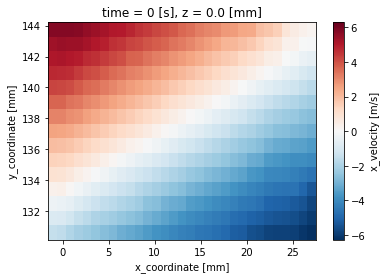

In [7]:
u.plot()

The PIV dataset is assigned with both physical coordinates (default, `x`, `y`) and pixel coordinates (`ix`, `iy`). Plotting over the "alternative" coordinates can be done using the following line:

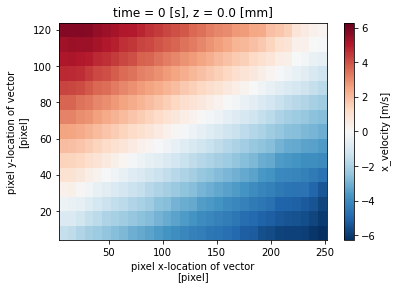

In [8]:
u.plot(y='iy', x='ix')

The **PIVview parameters** use for the example are stored as `dict` at root level:

In [9]:
with H5PIV(piv_snapshot.hdf_filename, 'r+') as h5piv:
    piv_parameters = h5piv.attrs.piv_parameters
piv_parameters

{'---- PIV image pre-processing parameters ----': {'View0_PIV_Image_Rotation': 0,
  'View0_PIV_Image_Flip': 2,
  'View0_PIV_Image_SplitPCO': 1,
  'View0_PIV_Image_SplitMode': 0,
  'View0_PIV_Image_ZDirection': 0,
  'View0_PIV_Image_InterpolationMethod': 2,
  'View0_PIV_Image_InterpolationDegree': 4,
  'View0_PIV_Image_UseFloat': 1,
  'View0_PIV_Image_BkgdSubtract': 0,
  'View0_PIV_Image_Bkgd': '',
  'View0_PIV_Image_Bkgd2Subtract': 0,
  'View0_PIV_Image_Bkgd2': '',
  'View0_PIV_Image_BkgdSubtractMethod': 1,
  'View0_PIV_Image_BkgdSubtractScaleFactor': 200,
  'View0_PIV_Image_MaskEnable': 0,
  'View0_PIV_Image_MaskInvert': 0,
  'View0_PIV_Image_MaskRandomize': 1,
  'View0_PIV_Image_MaskSwapPixels': 0,
  'View0_PIV_Image_Mask': '',
  'View0_PIV_Image_Mask2Enable': 0,
  'View0_PIV_Image_Mask2': '',
  'View0_PIV_Image_Crop': 0,
  'View0_PIV_Image_CropRect': [128, 128, 512, 512, 0, 1],
  'View0_PIV_Image_Transform_Enable': 0,
  'View0_PIV_Image_Transform_SecondImageOnly': 0,
  'View0_PIV_Im